## Luis Eduardo Jiménez del Muro  -  13/09/2023

# Tarea - Ajuste de curvas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt


---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

**Graficar datos previo a polinomios**

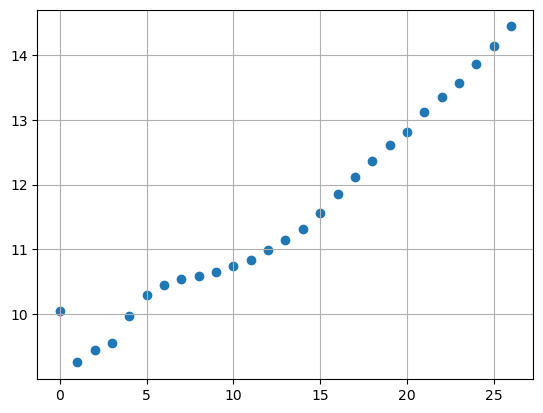

In [3]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

m = len(data)

x = np.linspace(0, m-1, m)

plt.figure()
plt.scatter(x, data)
plt.grid()

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

**Realizar el ajuste de curvas**

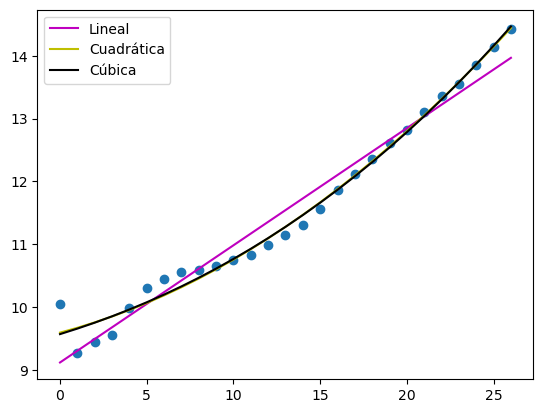

In [4]:
def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return ( error.T @ error)[0][0]

ones = np.ones([m, 1])
y_vector = np.reshape(data, [m, 1])

#Lineal = b0 + b1*x
beta = np.random.rand(2)
x_factor = np.reshape(x, [m, 1])
X = np.hstack((ones, x_factor))
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#Cuadrática b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

# Cúbica b0 + b1*x + b2*x**2 + b3**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))

plt.figure()
plt.scatter(x, data)
plt.plot(x, X @ np.reshape(sol1.x, [2, 1]), "m" ,label="Lineal")
plt.plot(x, X2 @ np.reshape(sol2.x, [3, 1]), "y", label="Cuadrática")
plt.plot(x, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.legend(loc = "best")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

## 1. Importar la tabla ##

In [5]:
import pandas as pd
tabla = pd.read_csv("population_data.csv")
poblacion = np.array(tabla["Poblacion"])
nacimientos = np.array(tabla["Nacimientos"])
tabla


,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


## 2. Realizar el ajuste de polinomios a la población ##

**Graficar datos previo a polinomios**

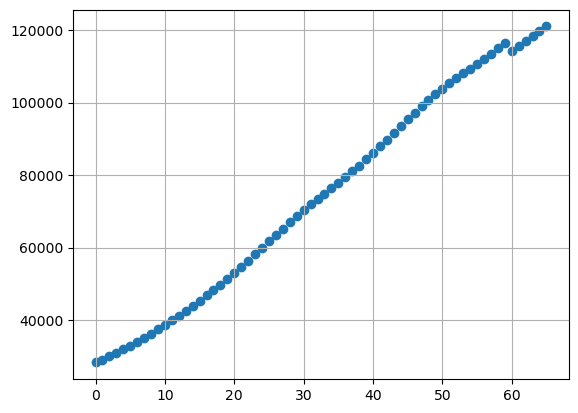

In [6]:
m = len(poblacion)

x = np.linspace(0, m-1, m)

plt.figure()
plt.scatter(x, poblacion)
plt.grid()

**Realizar el ajuste de curvas**

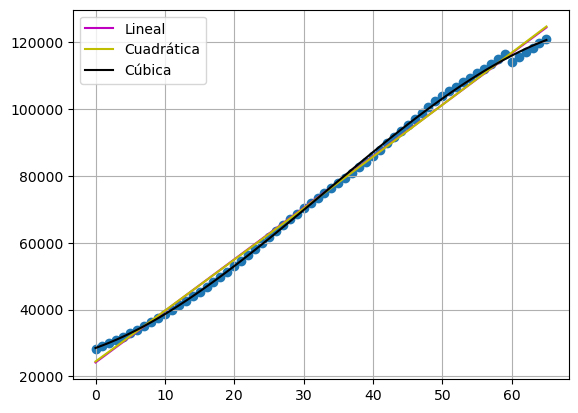

In [7]:
def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return ( error.T @ error)[0][0]


ones = np.ones([m, 1])
y_vector = np.reshape(poblacion, [m, 1])

#Lineal = b0 + b1*x
beta = np.random.rand(2)
x1_factor = np.reshape(x, [m, 1])
X = np.hstack((ones, x1_factor))
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#Cuadrática b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x1_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

# Cúbica b0 + b1*x + b2*x**2 + b3**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x1_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))


plt.figure()
plt.grid()
plt.scatter(x, poblacion)
plt.plot(x, X @ np.reshape(sol1.x, [2, 1]), "m" ,label="Lineal")
plt.plot(x, X2 @ np.reshape(sol2.x, [3, 1]), "y", label="Cuadrática")
plt.plot(x, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.legend(loc = "best")

In [8]:
sol3

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 25240442.638595335
        x: [ 2.848e+04  7.391e+02  3.056e+01 -3.092e-01]
      nit: 7
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 1.084e-01 -1.241e-02  3.789e-04 -3.375e-06]
            [-1.241e-02  1.954e-03 -6.784e-05  6.478e-07]
            [ 3.789e-04 -6.784e-05  2.520e-06 -2.511e-08]
            [-3.375e-06  6.478e-07 -2.511e-08  2.575e-10]]
     nfev: 80
     njev: 16

**ERROR**

<BarContainer object of 3 artists>

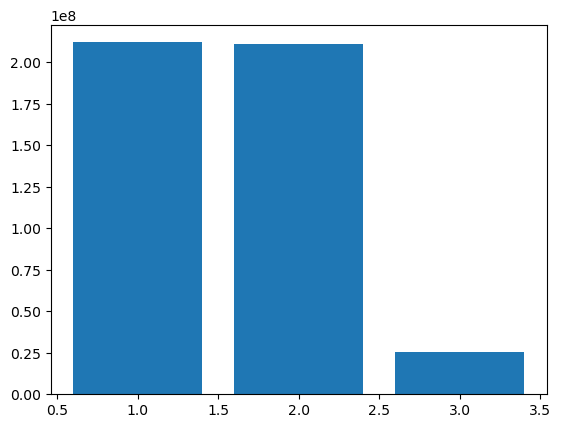

In [9]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])

El polinomio que mejor se ajusta es el de grado 3, ya que, tiene el mínimo error.

## 3. Realizar el ajuste de polinomios a los nacimientos ##

**Graficar datos previo a polinomios**

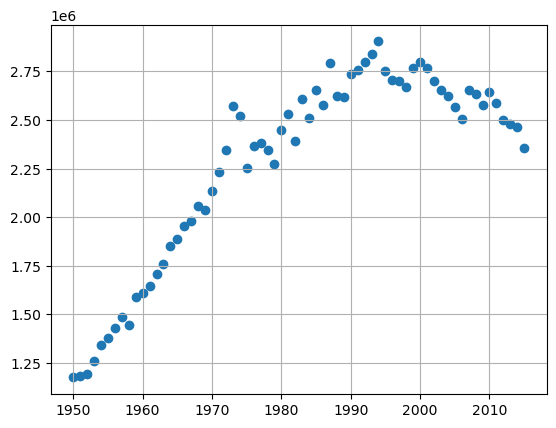

In [10]:
m = len(nacimientos)

x = np.linspace(0, m-1, m)

plt.figure()
plt.scatter(x+1950, nacimientos)
plt.grid()

**Realizar el ajuste de curvas**

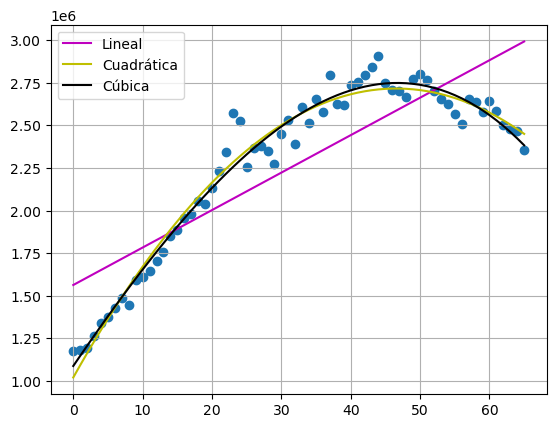

In [11]:
def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return ( error.T @ error)[0][0]


ones = np.ones([m, 1])
y_vector = np.reshape(nacimientos, [m, 1])

#Lineal = b0 + b1*x
beta = np.random.rand(2)
x1_factor = np.reshape(x, [m, 1])
X1 = np.hstack((ones, x1_factor))
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#Cuadrática b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x1_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

# Cúbica b0 + b1*x + b2*x**2 + b3**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x1_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))


plt.figure()
plt.grid()
plt.scatter(x, nacimientos)
plt.plot(x, X1 @ np.reshape(sol1.x, [2, 1]), "m" ,label="Lineal")
plt.plot(x, X2 @ np.reshape(sol2.x, [3, 1]), "y", label="Cuadrática")
plt.plot(x, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.legend(loc = "best")

**ERROR**

<BarContainer object of 3 artists>

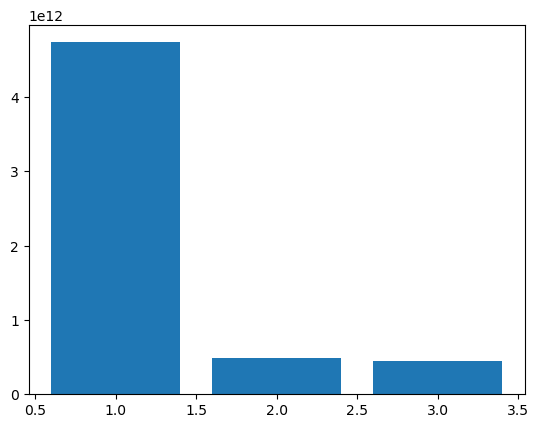

In [12]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])

El polinomio que mejor se ajusta es el de grado 3, ya que el error es el mínimo. Sin embargo, el error del cuadrático es casi igual.